<a href="https://colab.research.google.com/github/SambamD/Machine-Learning/blob/main/DBSCAN_Algorithme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import des librairies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

# Import du dataset

In [ ]:
pd_df = pd.read_csv("sample_data/orangeEtmoi")
df = pd_df[:30000]
df

,Unnamed: 0,@timestamp,event.action,event.dataset,event_duration_avg,status_code_4xx,status_code_5xx,transaction_failed,transaction_success,transaction_total,event_action,event_dataset
0,AEFzNCVgEgfK013TQqj1iOSKFgAAAAAA,2021-01-23 03:33:00,Achat de credit,selfcare-b2c-om,1479.000000,1,0,1,0,1,0,4.0
1,AEFz0WJnhVgtY1-MnK5UoQ43CwAAAAAA,2021-01-23 03:39:00,Achat de credit,selfcare-b2c-om,2153.000000,0,0,0,1,1,0,4.0
2,AEFz1J_XUxzbJBuOOulNknYKbgAAAAAA,2021-01-23 03:32:00,Achat de pass illimix,selfcare-b2c-om,3476.000000,0,0,0,1,1,1,4.0
3,AEFzjeHPTZRlUCTpz52W7U8jLAAAAAAA,2021-01-23 03:37:00,Achat de pass illimix,selfcare-b2c-om,3583.000000,0,0,0,1,1,1,4.0
4,AEFzolIJmr8WE39cScrR6BMYngAAAAAA,2021-01-23 03:44:00,Achat de pass illimix,selfcare-b2c-om,2121.000000,1,0,1,0,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AFJzUSw3xMIoMJS6MBeNUSKQGAAAAAAA,2021-01-23 21:33:00,Recuperation du nom du marchand Orange Money,selfcare-b2c-om,111.500000,0,0,0,2,2,72,4.0
29996,AFJzUNuFCYY2KnnJVj18beSFDwAAAAAA,2021-01-23 21:33:00,Recuperation du pinpad pour un client Orange M...,selfcare-b2c-om,606.152941,0,0,0,85,85,73,4.0
29997,AFJzlc3Ixcl6RX-reD4plaMx_QAAAAAA,2021-01-23 21:33:00,Recuperation du solde du client Orange Money,selfcare-b2c-om,1107.052632,0,0,0,19,19,74,4.0
29998,AFJzX8aeCzI-s97f6ZYjE_5ltAAAAAAA,2021-01-23 21:33:00,Recuperer la liste des transactions,selfcare-b2c-reporting,5.790123,0,0,0,81,81,75,5.0


# Prétraitement des données

In [ ]:
warnings.filterwarnings("ignore")
df["date"] = pd.to_datetime(df["@timestamp"])
df2 = df.drop(["Unnamed: 0","@timestamp","event.action","event.dataset"], axis=1)
df2.dropna(inplace=True)
df2 = df2.set_index("date")
df2.head()

,event_duration_avg,status_code_4xx,status_code_5xx,transaction_failed,transaction_success,transaction_total,event_action,event_dataset
date,,,,,,,,
2021-01-23 03:33:00,1479.0,1,0,1,0,1,0,4.0
2021-01-23 03:39:00,2153.0,0,0,0,1,1,0,4.0
2021-01-23 03:32:00,3476.0,0,0,0,1,1,1,4.0
2021-01-23 03:37:00,3583.0,0,0,0,1,1,1,4.0
2021-01-23 03:44:00,2121.0,1,0,1,0,1,1,4.0


# Visualisation des données

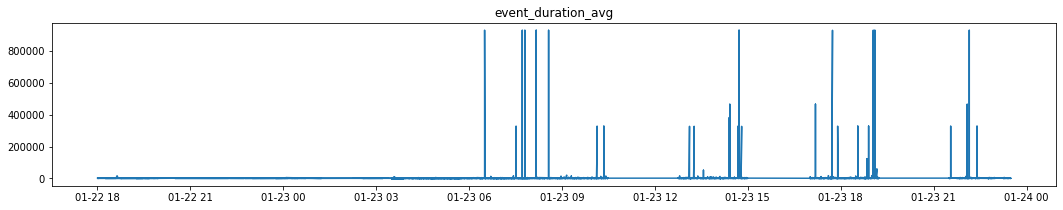

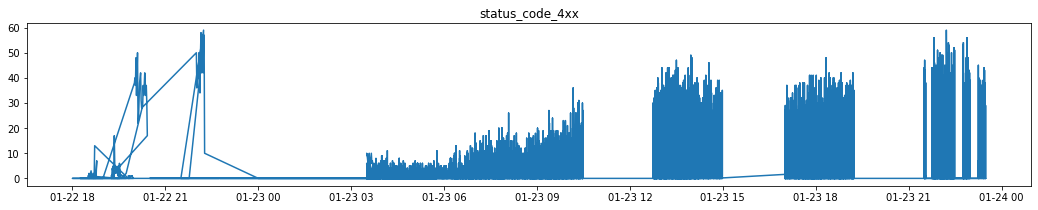

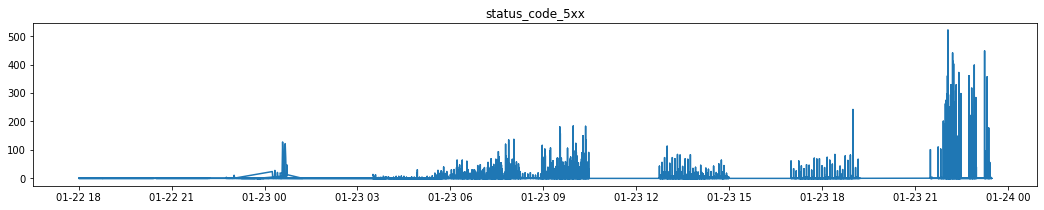

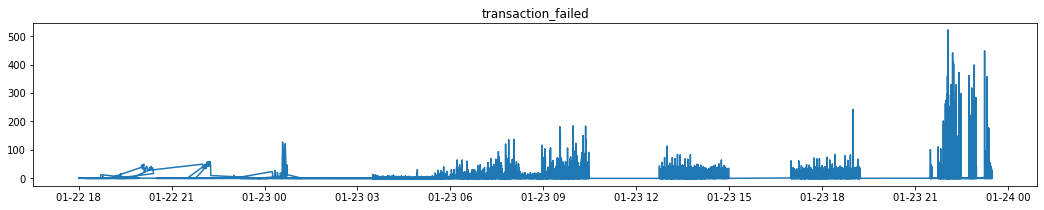

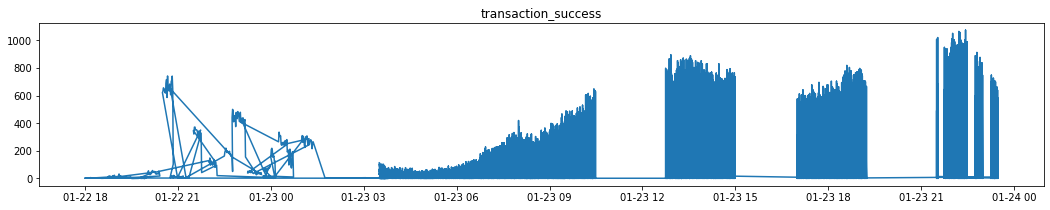

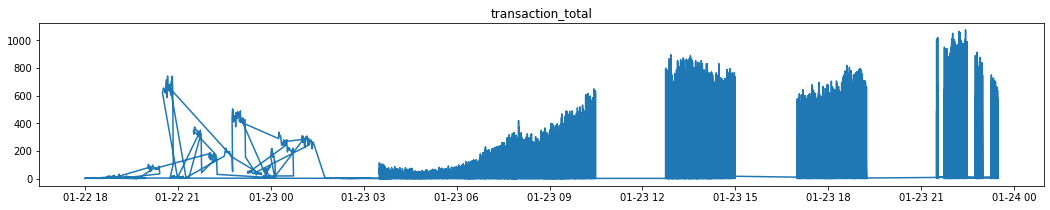

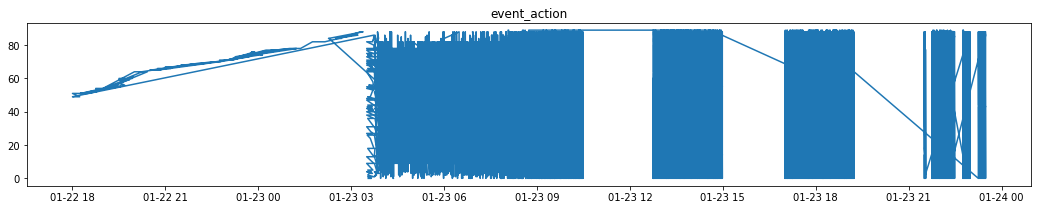

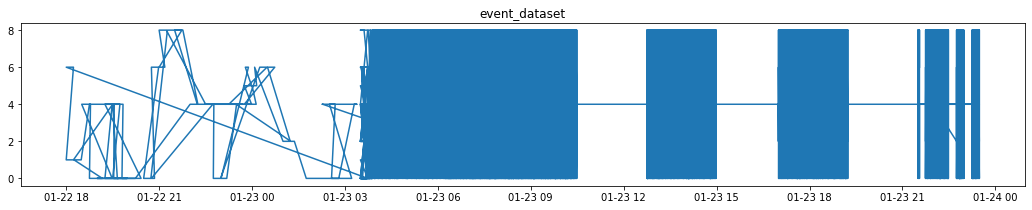

In [ ]:
names = df2.columns
for name in names:
  plt.figure(figsize=(18,3))
  plt.plot(df2.index.values, df2[name])
  plt.title(name)
  plt.show()

# Normalisation des données et Réduction des dimensions avec du PCA

In [ ]:
scaler = StandardScaler()
pca = PCA()
X=df2[names]
pipeline = make_pipeline(scaler,pca)
pipeline.fit(X)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

Visualisation des composantes principales

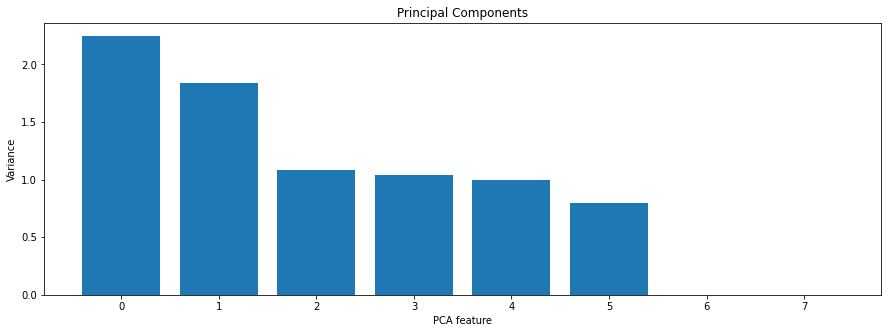

In [ ]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Principal Components")
plt.show()

PCA avec les deux principales dimensions

In [ ]:
pca = PCA(n_components=2)
principalDf = pd.DataFrame(data = pca.fit_transform(X), columns = ['pc1', 'pc2'])
principalDf

,pc1,pc2
0,508.737423,-102.564229
1,1182.737259,-101.717993
2,2505.737230,-101.407591
3,2612.737228,-101.384170
4,1150.737411,-102.402887
...,...,...
29995,-858.762750,-99.252104
29996,-364.135520,18.224742
29997,136.784600,-74.957474
29998,-964.497081,12.478835


### Visualisation des résulats

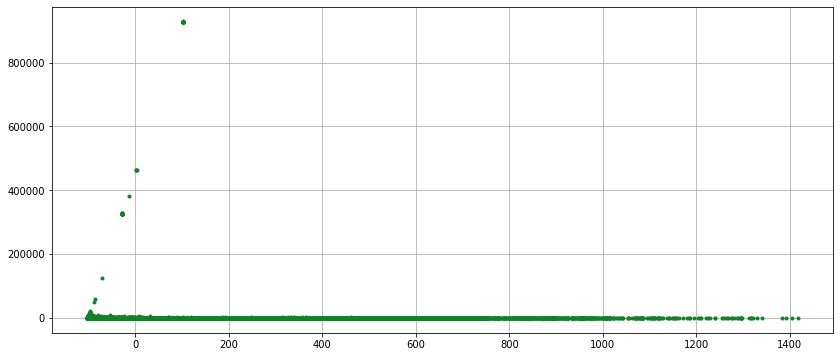

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(principalDf["pc2"],principalDf["pc1"], marker=".", linewidth=0, color='#128128')
plt.grid()
plt.show()

## DBSCAN  : Algorithme de clustering basé sur la densité
Deux paramètres : 
  - eps : Distance maximale entre deux voisins
  - min_samples: nombre minimum d'éléments dans un cluster (D || 2 x D)

In [ ]:
df2["pc1"] = principalDf["pc1"].values
df2["pc2"] = principalDf["pc2"].values
df2

,event_duration_avg,status_code_4xx,status_code_5xx,transaction_failed,transaction_success,transaction_total,event_action,event_dataset,pc1,pc2
date,,,,,,,,,,
2021-01-23 03:33:00,1479.000000,1,0,1,0,1,0,4.0,508.737423,-102.564229
2021-01-23 03:39:00,2153.000000,0,0,0,1,1,0,4.0,1182.737259,-101.717993
2021-01-23 03:32:00,3476.000000,0,0,0,1,1,1,4.0,2505.737230,-101.407591
2021-01-23 03:37:00,3583.000000,0,0,0,1,1,1,4.0,2612.737228,-101.384170
2021-01-23 03:44:00,2121.000000,1,0,1,0,1,1,4.0,1150.737411,-102.402887
...,...,...,...,...,...,...,...,...,...,...
2021-01-23 21:33:00,111.500000,0,0,0,2,2,72,4.0,-858.762750,-99.252104
2021-01-23 21:33:00,606.152941,0,0,0,85,85,73,4.0,-364.135520,18.224742
2021-01-23 21:33:00,1107.052632,0,0,0,19,19,74,4.0,136.784600,-74.957474


Normalisation des données

In [ ]:
principalDf_scaler = StandardScaler().fit(principalDf)
principalDf = principalDf_scaler.transform(principalDf)
principalDf

array([[ 0.02688436, -0.50785991],
       [ 0.06250205, -0.50366966],
       [ 0.13241632, -0.50213267],
       ...,
       [ 0.00722842, -0.37116152],
       [-0.05096909,  0.06179055],
       [-0.04712599,  3.32442216]])

Entrainement des données

In [ ]:
model = DBSCAN(eps = 0.3, min_samples = 4, metric="euclidean").fit(principalDf)
model

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

### Visualisation des résultats
Les données aberrantes seront en rouge. Celles-ci, n'appartenant à aucun cluster, sont donc considérées comme des anomalies.

In [ ]:
# Isoler les données aberrantes
outliers_df = df2[model.labels_ == -1]
clusters_df = df2[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = "red"

# Infos sur les clusters
clusters = Counter(model.labels_)
print(f"Clusters : {clusters}")
print(f"Outliers : {outliers_df}")
print(f"Number of cluster : {len(clusters)}")

Clusters : Counter({0: 29971, 2: 12, 1: 10, -1: 7})
Outliers :                      event_duration_avg  ...        pc2
date                                     ...           
2021-01-23 13:34:00             51373.0  ... -89.132497
2021-01-23 14:24:00            381394.0  ... -14.690488
2021-01-23 14:25:00            465060.0  ...   2.208864
2021-01-23 19:10:00             59919.0  ... -86.470172
2021-01-23 18:51:00            123955.5  ... -72.453582
2021-01-23 17:11:00            465833.0  ...   2.378062
2021-01-23 22:05:00            464841.5  ...   2.161038

[7 rows x 10 columns]
Number of cluster : 4


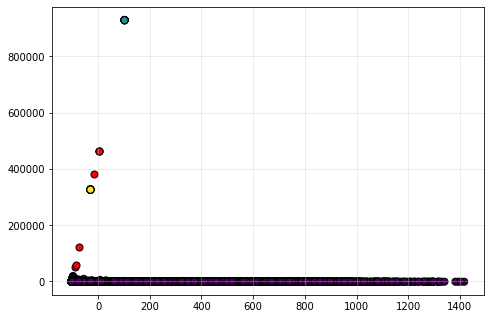

In [ ]:
# Plot clusters and outliers
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.scatter(clusters_df["pc2"], clusters_df["pc1"],
           c=colors_clusters, edgecolors = "black", s=50)
ax.scatter(outliers_df["pc2"], outliers_df["pc1"],
           c=color_outliers, edgecolors = "black", s=50)
plt.grid(which="major", color="#cccccc", alpha=0.45)
plt.show()

In [ ]:
silhouette_score(df2,model.labels_)

0.9970354798648623